In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks") 
from datasets import MNISTDataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


11493376/11490434 [==============================] - 0s 0us/step


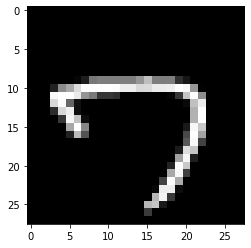

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[468], cmap="Greys_r")

In [6]:
#reshaping data
data = MNISTDataset(train_images.reshape([-1,784]),train_labels,
                    test_images.reshape([-1,784]),test_labels, batch_size=128) 
print(tf.shape(train_labels))


tf.Tensor([60000], shape=(1,), dtype=int32)


In [0]:
#training
train_steps = 1000
learning_rate = 0.1

w_in = tf.Variable(tf.random.uniform([784,112],minval= -0.1,maxval= 0.1,dtype = np.float32))
b_in = tf.Variable(np.zeros(112,dtype= np.float32))
w_hid = tf.Variable(tf.random.uniform([112,10],minval= -0.1,maxval= 0.1,dtype = np.float32))
b_hid = tf.Variable(np.zeros(10,dtype=np.float32))


In [8]:
for step in range(train_steps):
  img_batch , lbl_batch = data.next_batch()
  with tf.GradientTape(persistent=True) as tape:
    logits_hid = tf.matmul(img_batch,w_in) + b_in
    #print(logits_hid)
    op_hid = tf.nn.relu(logits_hid)
    #print(op_hid)
    logits_out = tf.matmul(op_hid, w_hid) + b_hid

    xent_out = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits_out, labels= lbl_batch))
    xent_hid = tf.multiply(w_hid,xent_out)
        
  grads_out = tape.gradient(xent_out, [w_hid,b_hid])
  grads_hid = tape.gradient(xent_hid, [w_in,b_in])
  w_hid.assign_sub(learning_rate * grads_out[0])
  b_hid.assign_sub(learning_rate * grads_out[1])
  w_in.assign_sub(learning_rate * grads_hid[0])
  b_in.assign_sub(learning_rate * grads_hid[1])



  if not step % 100:
    preds = tf.argmax(logits_out, axis= 1 , output_type=tf.int32)
    acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),tf.float64))
    print("Loss : {} Accuracy : {}".format(xent_out, acc))

Loss : 2.291318893432617 Accuracy : 0.125
Loss : 0.49375656247138977 Accuracy : 0.875
Loss : 0.3195691704750061 Accuracy : 0.90625
Loss : 0.24144400656223297 Accuracy : 0.9296875
Loss : 0.22254371643066406 Accuracy : 0.9453125
Starting new epoch...
Loss : 0.32033973932266235 Accuracy : 0.921875
Loss : 0.2570001482963562 Accuracy : 0.90625
Loss : 0.27587637305259705 Accuracy : 0.9375
Loss : 0.2671993374824524 Accuracy : 0.9453125
Loss : 0.19772227108478546 Accuracy : 0.9609375
Starting new epoch...


In [9]:
test_pred_inter = tf.nn.relu(tf.matmul(data.test_data, w_in) + b_in)  
test_preds = tf.argmax(tf.matmul(test_pred_inter, w_hid) + b_hid, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float64))
print(acc)

tf.Tensor(0.9367, shape=(), dtype=float64)
